In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, SGD, AdamW , Adafactor, Adadelta, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Directory paths
train_data_dir = "/home/userone/Projects/Classification/FaceFakenessDetector/real_vs_fake/real-vs-fake/train"
validation_data_dir = "/home/userone/Projects/Classification/FaceFakenessDetector/real_vs_fake/real-vs-fake/valid"

# Image dimensions
img_height = 150
img_width = 150
num_channels = 3  # If you have color images, change to 3; if grayscale, use 1

# Batch size
batch_size = 128

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    classes=['fake', 'real'],
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    classes=['fake', 'real'],
    shuffle=True
)

# Define your CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, num_channels)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 4 classes
  

2024-01-01 03:01:25.291533: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-01 03:01:27.161905: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-01 03:01:27.172241: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-01 03:01:31.394802: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [3]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

log_dir = "logs/fit/"  # Directory to store TensorBoard logs
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
model.fit(train_generator, validation_data=validation_generator, epochs=100, callbacks=[tensorboard_callback])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(validation_generator)

Epoch 1/100


2024-01-01 03:02:06.962065: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 358875136 exceeds 10% of free system memory.
2024-01-01 03:02:08.153438: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 358875136 exceeds 10% of free system memory.


  1/782 [..............................] - ETA: 1:12:36 - loss: 0.7093 - accuracy: 0.3828

2024-01-01 03:02:09.331000: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 358875136 exceeds 10% of free system memory.
2024-01-01 03:02:10.027519: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 358875136 exceeds 10% of free system memory.


  2/782 [..............................] - ETA: 22:01 - loss: 1.2223 - accuracy: 0.4219  

2024-01-01 03:02:13.890731: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 358875136 exceeds 10% of free system memory.


782/782 [==============================] - 2095s 3s/step - loss: 0.6719 - accuracy: 0.5832 - val_loss: 0.6341 - val_accuracy: 0.6482
Epoch 2/100
782/782 [==============================] - 1541s 2s/step - loss: 0.6314 - accuracy: 0.6443 - val_loss: 0.6407 - val_accuracy: 0.6342
Epoch 3/100
782/782 [==============================] - 1553s 2s/step - loss: 0.6070 - accuracy: 0.6717 - val_loss: 0.6032 - val_accuracy: 0.6694
Epoch 4/100
782/782 [==============================] - 1588s 2s/step - loss: 0.5878 - accuracy: 0.6896 - val_loss: 0.5701 - val_accuracy: 0.7079
Epoch 5/100
782/782 [==============================] - 1767s 2s/step - loss: 0.5742 - accuracy: 0.7011 - val_loss: 0.5470 - val_accuracy: 0.7276
Epoch 6/100
782/782 [==============================] - 1646s 2s/step - loss: 0.5571 - accuracy: 0.7163 - val_loss: 0.5529 - val_accuracy: 0.7207
Epoch 7/100
782/782 [==============================] - 1667s 2s/step - loss: 0.5461 - accuracy: 0.7232 - val_loss: 0.5197 - val_accuracy: 0.74

In [5]:
model.save('fakefacedetect')

INFO:tensorflow:Assets written to: fakefacedetect/assets


INFO:tensorflow:Assets written to: fakefacedetect/assets


1/1 [==============================] - 0s 81ms/step
Predicted class:  fake


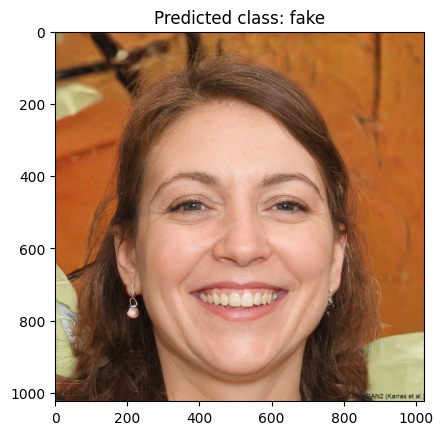

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load your trained model
model = tf.keras.models.load_model('fakefacedetect')  # Replace 'your_model_path' with the actual path to your trained model.

img_height = 150
img_width = 150

# Load and preprocess the input image
img_path = '/home/userone/Pictures/thispersondoesnotexist1.jpeg'  # Replace with the path to your input image.
img = image.load_img(img_path, target_size=(img_height, img_width))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)  # Add an extra dimension to simulate a batch of one image
img = img / 255.0  # Normalize the pixel values if your model expects it

# Make predictions
predictions = model.predict(img)

# Get the predicted class
predicted_class_index = np.argmax(predictions)
predicted_class = ['fake', 'real'][predicted_class_index]

# Display the predicted class
print("Predicted class: ", predicted_class)

plt.imshow(image.load_img(img_path))
plt.title(f'Predicted class: {predicted_class}')
plt.show()